In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

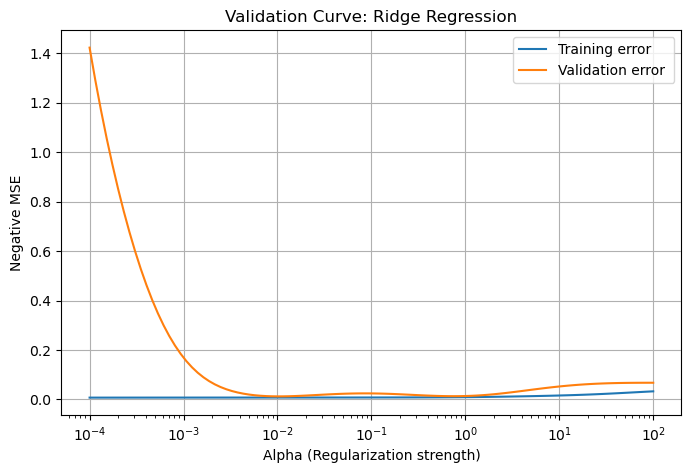

In [42]:
# Synthetic data for polynomial regression
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 2 - 1, axis=0)  # x in [-1, 1]
y = np.exp(-X[:, 0]**2) + 0.1 * np.random.randn(100)

# Alpha range to test
alphas = np.logspace(-4, 2, 100)

# Validation curve for Ridge
train_scores, valid_scores = validation_curve(
    make_pipeline(PolynomialFeatures(degree=15), Ridge()),
    X, y, param_name="ridge__alpha", param_range=alphas,
    scoring="neg_mean_squared_error", cv=5
)

# Mean and std
train_mean = -np.mean(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)

# Plot
plt.figure(figsize=(8, 5))
plt.semilogx(alphas, train_mean, label='Training error ')
plt.semilogx(alphas, valid_mean, label='Validation error ')
plt.xlabel("Alpha (Regularization strength)")
plt.ylabel("Negative MSE")
plt.title("Validation Curve: Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()


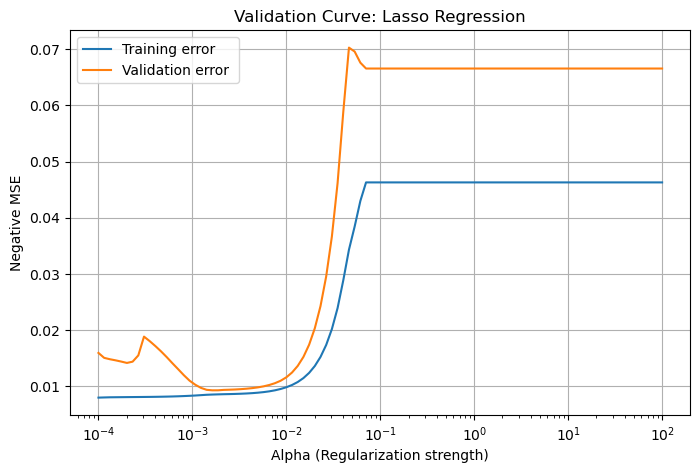

In [44]:
# Validation curve for Lasso
train_scores_lasso, valid_scores_lasso = validation_curve(
    make_pipeline(PolynomialFeatures(degree=15), Lasso(max_iter=10000)),
    X, y, param_name="lasso__alpha", param_range=alphas,
    scoring="neg_mean_squared_error", cv=5
)

# Mean and std
train_mean_lasso = -np.mean(train_scores_lasso, axis=1)
valid_mean_lasso = -np.mean(valid_scores_lasso, axis=1)

# Plot
plt.figure(figsize=(8, 5))
plt.semilogx(alphas, train_mean_lasso, label='Training error ')
plt.semilogx(alphas, valid_mean_lasso, label='Validation error ')
plt.xlabel("Alpha (Regularization strength)")
plt.ylabel("Negative MSE")
plt.title("Validation Curve: Lasso Regression")
plt.legend()
plt.grid(True)
plt.show()


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Refitting plain model
plain_model = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())
plain_model.fit(X_train, y_train)

# Predictions
y_pred_plain = plain_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)  # make sure ridge_model is fitted
y_pred_lasso = lasso_model.predict(X_test)  # make sure lasso_model is fitted

# Errors
mse_plain = mean_squared_error(y_test, y_pred_plain)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Result Display
print("🧾 Final Model Comparison on Test Set:\n")
print(f"📉 Plain Linear Regression MSE: {mse_plain:.4f}")
print(f"🧊 Ridge Regression (alpha=0.001) MSE: {mse_ridge:.4f}")
print(f"🧨 Lasso Regression (alpha=0.001) MSE: {mse_lasso:.4f}")


🧾 Final Model Comparison on Test Set:

📉 Plain Linear Regression MSE: 0.0158
🧊 Ridge Regression (alpha=0.001) MSE: 0.0074
🧨 Lasso Regression (alpha=0.001) MSE: 0.0064
